In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
#export_graphviz() 함수를 활용해 그래프 정의를 iris_tree.dot 파일로 출력하여 훈련된 결정트리를 시각화
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

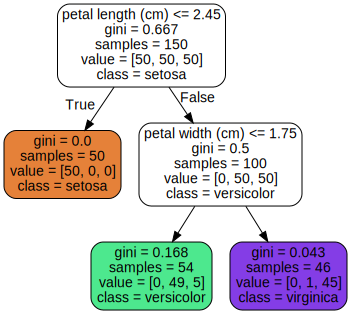

In [ ]:
from graphviz import Source

Source.from_file("iris_tree.dot")

In [ ]:
#클래스 확률 추정
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [ ]:
tree_clf.predict([[5, 1.5]])

array([1])

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X_moons , y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [ ]:
X_moon_test, y_moon_test = make_moons(n_samples=1000, noise=0.2, random_state=43)

print(tree_clf1.score(X_moon_test, y_moon_test))
tree_clf2.score(X_moon_test, y_moon_test)

0.898


0.92

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200,1) - 0.5
y_quad = X_quad**2 + 0.025*np.random.randn(200,1)

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

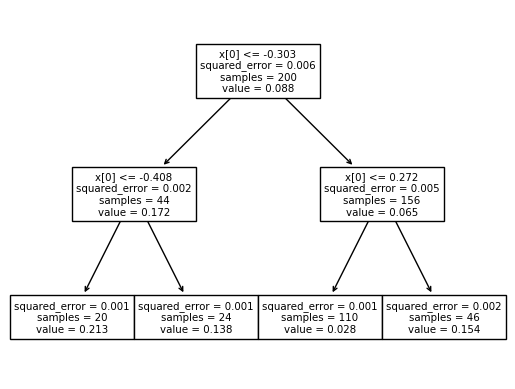

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plot_tree(tree_reg)
plt.show()

In [ ]:
from sklearn.pipeline import make_pipeline

# **연습문제 7번**

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
#a make_moons(n_samples=1000, noise=0.4)를 사용해 데이터셋 생성
X_moons , y_moons = make_moons(n_samples=1000, noise=0.4, random_state=42)

In [ ]:
#b train_test_split()을 사용해 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size = 0.2, random_state = 42)

In [ ]:
#c. DecisionTreeClassifier의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행(GridSearchCV를 사용)
#힌트: 여러 가지 max_leaf_nodes 값을 시도해보세요.
from sklearn.tree import DecisionTreeClassifier #추가
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
} #탐색할 하이퍼파라미터의 후보 값들을 지정한 딕셔너리

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params,
                              cv=3) #결정 트리 분류기를 기반으로 그리드 서치 객체 생성. 이때 교차 검증을 사용, cv=3는 3-폴드 교차 검증을 의미.

grid_search_cv.fit(X_train, y_train) #그리드 서치를 사용하여 훈련 데이터 (X_train, y_train)에 대해 최적의 하이퍼파라미터 조합을 찾음

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
grid_search_cv.best_estimator_
#그리드 서치를 통해 찾은 최적의 모델을 반환. 이 모델은 최적의 하이퍼파라미터를 사용하여 훈련된 결정 트리 분류기

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, random_state=42)

In [ ]:
#d. 찾은 매개변수를 사용해 전체 훈련 세트에 대해 모델을 훈련시키고 테스트 세트에서 성능을 측정
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.855

# **연습문제 8번**

In [ ]:
#a. 이전 연습문제에 이어서, 훈련 세트의 서브셋을 1,000개 생성
# 각각은 무작위로 선택된 100개의 샘플을 담고 있습니다. 힌트: 사이킷런의 ShuffleSplit을 사용할 수 있습니다.

from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances,
                  random_state=42)

for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [ ]:
#b. 앞에서 찾은 최적의 매개변수를 사용해 각 서브셋에 결정 트리를 훈련
import numpy as np
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)

    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.814735

In [ ]:
# c. 각 테스트 세트 샘플에 대해 1,000개의 결정 트리 예측을 만들고 다수로 나온 예측만 취합니다(사이파이의 mode() 함수를 사용할 수 있습니다). 그러면 테스트 세트에 대한 _다수결 예측_이 만들어집니다.

Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [ ]:
from scipy.stats import mode

# scipy 1.11에서 keepdims의 기본값이 False로 바뀝니다.
# 이와 관련된 경고를 피하기 위해 명시적으로 False로 지정합니다.
y_pred_majority_votes, n_votes = mode(Y_pred, axis=0, keepdims=False)

In [ ]:
y_pred_majority_votes.shape, n_votes.shape

((200,), (200,))

In [ ]:
accuracy_score(y_test, y_pred_majority_votes)

0.85